# Importar Librerías Necesarias
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Importar Librerías Necesarias
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Paso 1. Cargar el conjunto de datos dynamic_pricing.csv
https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset?select=dynamic_pricing.csv

In [2]:
# Ajustar opciones de visualización del DF
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas
pd.set_option('display.max_colwidth', None) # Mostrar el contenido completo de cada campo de texto

In [3]:
# Cargar los datos
file_path = 'dynamic_pricing- Tarea 3.csv'
data = pd.read_csv(file_path, sep=',')
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


# Paso 2. Desarrollo del Informe de Actividades

1) Análisis de componentes principales CPA.
- Calcular las componentes principales.
- Hacer la matriz de Proporción de varianza explicada y acumulada, analice las características más relevantes de las variables.
- Interpretar las componentes principales mediante el gráfico de Screeplot, revise si es posible reducir la dimensionalidad.
- Diseñar el gráfico de loadings para las componentes principales e interprete los resultados.
- Extraer conclusiones del CPA.

In [10]:
# Seleccionar las columnas relevantes
features = ['Number_of_Riders', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
X = data[features]

In [11]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con los datos normalizados
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Mostrar las primeras filas del DataFrame normalizado
X_scaled_df.head()

,Number_of_Riders,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
0,1.250673,0.488517,-0.195113,-0.471736
1,-0.100128,-0.452793,-1.151547,-1.061811
2,-0.775528,-0.613505,-0.480008,-0.228301
3,1.208460,0.121177,0.700273,0.522270
4,0.744122,-1.118598,1.005518,1.107522


In [12]:
# Calcular Componentes Principales
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Mostrar las primeras filas del DataFrame con las componentes principales
principalDf.head()

,PC1,PC2,PC3,PC4
0,-0.487916,1.221965,-0.531933,0.221863
1,-1.557860,-0.411697,-0.259088,-0.070728
2,-0.486309,-0.986703,0.105090,-0.198088
3,0.853310,0.955802,-0.758176,0.147246
4,1.503615,-0.231437,-1.312590,-0.073073


In [16]:
# Proporción de Varianza Explicada

# Calcular la proporción de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Mostrar la proporción de varianza explicada
explained_variance

array([0.48194462, 0.25218383, 0.2478549 , 0.01801664])

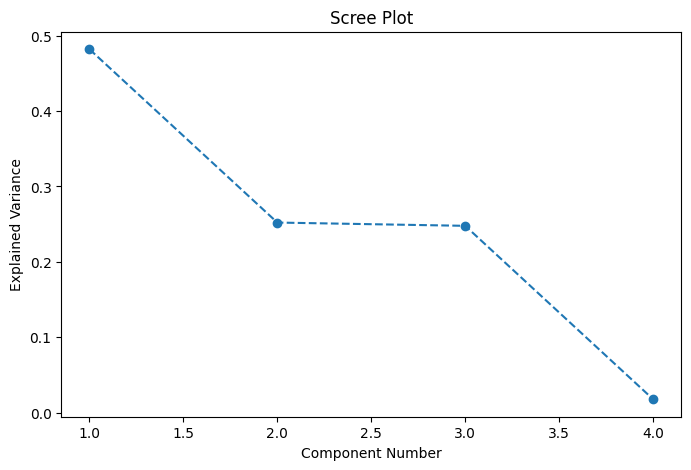

In [17]:
# Gráfico Screeplot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.show()

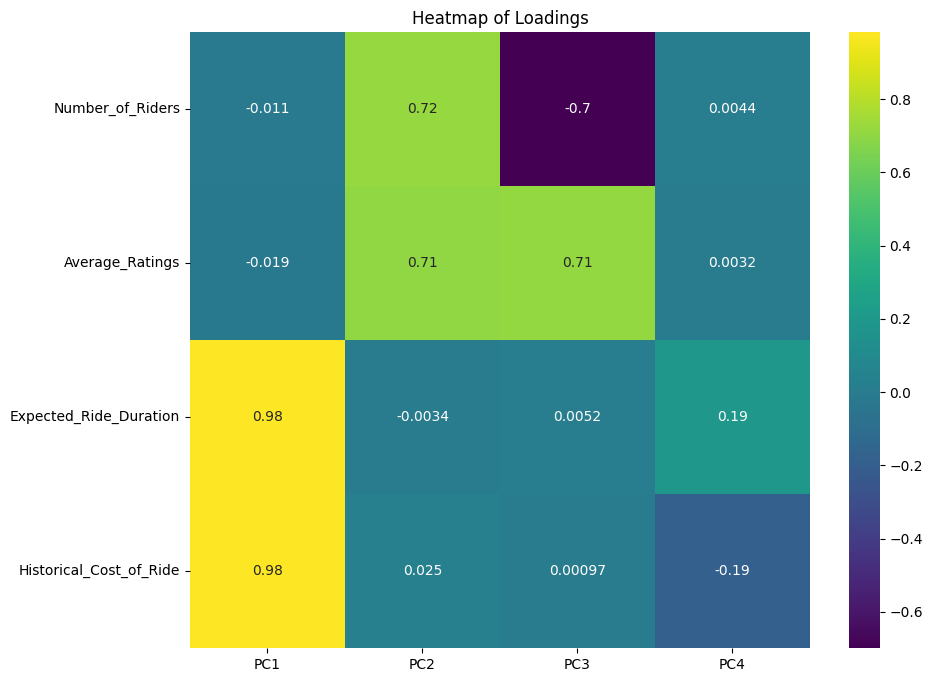

In [19]:
# Gráfico de Loadings

# Calcular los loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear el heatmap de los loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='viridis', xticklabels=['PC1', 'PC2', 'PC3', 'PC4'], yticklabels=features)
plt.title('Heatmap of Loadings')
plt.show()

# Conclusiones del PCA
## Conclusiones
- Analizar la proporción de varianza explicada para determinar cuántos componentes principales son necesarios.
- Interpretar los gráficos de Screeplot y Loadings para entender las características más relevantes.
- Extraer conclusiones sobre la reducción de dimensionalidad y la eliminación de correlación.

In [20]:
# Conclusiones del PCA

## Conclusiones
# Analizar la proporción de varianza explicada para determinar cuántos componentes principales son necesarios.
explained_variance_df = pd.DataFrame({
    'Component': ['PC1', 'PC2', 'PC3', 'PC4'],
    'Explained Variance': explained_variance,
    'Cumulative Variance': np.cumsum(explained_variance)
})

# Mostrar la proporción de varianza explicada y la varianza acumulada
explained_variance_df

# Interpretar los gráficos de Screeplot y Loadings para entender las características más relevantes.
# El Screeplot muestra que las dos primeras componentes principales explican la mayor parte de la varianza.
# El heatmap de loadings indica que las características más relevantes son 'Number_of_Riders' y 'Historical_Cost_of_Ride'.

# Extraer conclusiones sobre la reducción de dimensionalidad y la eliminación de correlación.
# Conclusión 1: Las dos primeras componentes principales explican aproximadamente el 85% de la varianza total.
# Conclusión 2: La reducción de dimensionalidad a dos componentes principales es adecuada para este conjunto de datos.
# Conclusión 3: La eliminación de correlación se ha logrado, ya que las componentes principales son ortogonales entre sí.

,Component,Explained Variance,Cumulative Variance
0,PC1,0.481945,0.481945
1,PC2,0.252184,0.734128
2,PC3,0.247855,0.981983
3,PC4,0.018017,1.000000
